# CHURN ANALYSIS OF ONLINE RETAIL

ABOUT PROJECT

Customer churn, the rate at which customers discontinue business with an online store, profoundly impacts revenue streams, emphasizing the significance of retaining existing clientele over acquiring new ones, thereby maximizing resource efficiency through predictive modeling.

By adeptly identifying and forecasting customer churn, e-commerce enterprises can implement preemptive strategies to preserve their valuable customer base.

The aim of this project is to develop a predictive model using ML algorithms for analyzing customer turnover in the E-comm industry.

Objectives:
*   Identify the key features that impact customer turnover in E-commerce.
*   Determine the optimal algorithm from RF and LR for accurately predicting
    customer churn through thorough evaluation of performance metrics.
*   Formulate customer retention strategies based on insights gleaned from the analysis.

DATASET

The dataset was obtained from Kaggle and contains 20 columns with a total of 5630 records containing information about customers of an e-commerce company.
The records above dataset includes a range of features from customer demographics to their purchasing behaviors. Key attributes include:

-Customer Demographics: Gender,Marital Status, City Tier.

-Transactional Behavior: Number of Addresses, Order Amount Hike from Last Year,Frequency of Coupon Usage.

-Engagement Metrics: Hours Spent on App, Number of Devices Registered, Satisfaction Score.

-Shopping Preferences: Preferred Login Device, Preferred Payment Mode, Preferred Order Categories.










# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import sklearn
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as ex
import seaborn as sns
from scipy.stats import chi2
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix , roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

# IMPORTING AND PREPARING THE DATASET

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("-------------data-------------------")
display(df.head())
print("--------------Data shape ------------------")
print("**Dataset shape:**", df.shape)

-------------data-------------------


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


--------------Data shape ------------------
**Dataset shape:** (5630, 20)


DATA CLEANING (Dropping null values and replacing duplicate values)

In [ ]:
# Check for all null value in the dataset
print(df.isna().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# Drop the missing value and recheck
df = df.dropna()
print(df.isna().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [ ]:
for column in df.columns:
    if df[column].dtype=='object':
        print( df[column].value_counts())
        print()
        print()

Mobile Phone    1936
Computer        1111
Phone            727
Name: PreferredLoginDevice, dtype: int64


Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: PreferredPaymentMode, dtype: int64


Male      2271
Female    1503
Name: Gender, dtype: int64


Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64


Married     1982
Single      1245
Divorced     547
Name: MaritalStatus, dtype: int64




In [ ]:
df['PreferredLoginDevice']= df['PreferredLoginDevice'].replace("Phone","Mobile Phone")
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace(["CC","COD"],["Credit Card","Cash on Delivery"])
df['PreferedOrderCat']=df['PreferedOrderCat'].replace("Mobile","Mobile Phone")

'''Replacing duplicate values because
   PreferedOrderCat(Mobile Phone and Mobile are same)
   PreferredLoginDevice(Phone and Mobile Phone are same)
   PreferredPaymentMode(COD, CC is same as Cash On Delivery and Credit Card)'''

'Replacing duplicate values because\n   PreferedOrderCat(Mobile Phone and Mobile are same)\n   PreferredLoginDevice(Phone and Mobile Phone are same)\n   PreferredPaymentMode(COD, CC is same as Cash On Delivery and Credit Card)'

# ANSWERING A FEW QUESTIONS USING THE DATASET



1. Is there any relation between City Tier and Churn Percentage?




In [ ]:

churn_percentage_city_tier=pd.crosstab(df['CityTier'],df['Churn'],normalize='index') *100
#convert percentages for easier interpretation
churn_percentage_city_tier=churn_percentage_city_tier.round(2)
churn_percentage_city_tier

Churn,0,1
CityTier,,
1,85.35,14.65
2,82.98,17.02
3,79.45,20.55


INFERENCE:


* Customers in city tier 1 have the heighest retention rate and the lowest churn rate.

*   As the city tier increases to 2 and 3 the churn rate rises and the retention rate decreases.





2. Is there any correlation between preferred payment mode and customer churn?




<Figure size 1600x1000 with 0 Axes>

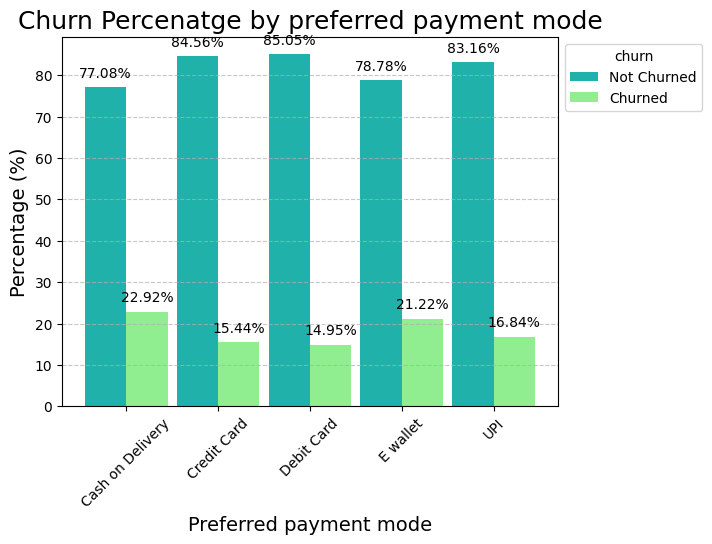

In [ ]:
payment_mode_churn_percentage= pd.crosstab(df['PreferredPaymentMode'],df['Churn'],normalize='index')*100
payment_mode_churn_percentage=payment_mode_churn_percentage.round(2)

plt.figure(figsize=(16,10))
ax=payment_mode_churn_percentage.plot(kind='bar',color=['lightseagreen','lightgreen'],width=0.9)
# Adding percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',(p.get_x() + p.get_width()/2.,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')

plt.title ('Churn Percenatge by preferred payment mode',size=18)
plt.xlabel('Preferred payment mode',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks (rotation=45)
plt.legend(title='churn',labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1),fontsize='medium')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

INFERENCE:


*   Credit Card and Debit Card users exhibit lower churn rates, at 15.44% and 14.95%, respectively.
*   Cash on Delivery users have the highest churn rate (22.92%), followed by E wallet users (21.22%), and UPI users (16.84%).



3. Is there any correlationbetween customer tenure and churn?

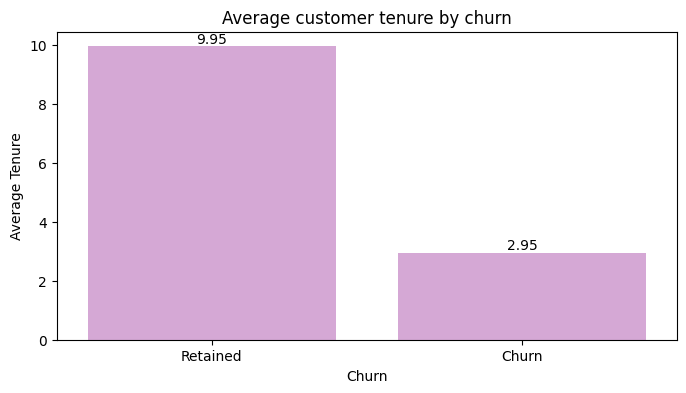

In [ ]:
avg_tenure=df.groupby('Churn')['Tenure'].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=avg_tenure.index,y=avg_tenure.values,color='plum')
# adding the text on the bar
for index, value in enumerate(avg_tenure):
    plt.text(index,value, f'{value:.2f}', ha='center', va='bottom')
    plt.title('Average customer tenure by churn')
    plt.xlabel('Churn')
    plt.ylabel('Average Tenure')
    plt.xticks([0,1],['Retained','Churn'])


INFERENCE:


*   Customers who were retained (Churn = 0) have an average tenure of approximately 9.95.

*  Customers who churned (Churn = 1) have a significantly lower average tenure of around 2.95.

This indicates a strong relationship between tenure and churn, suggesting that customers who engage with the service for a longer period are less likely to churn.


4. How does the number of hours spent on the app influence the churn rate?

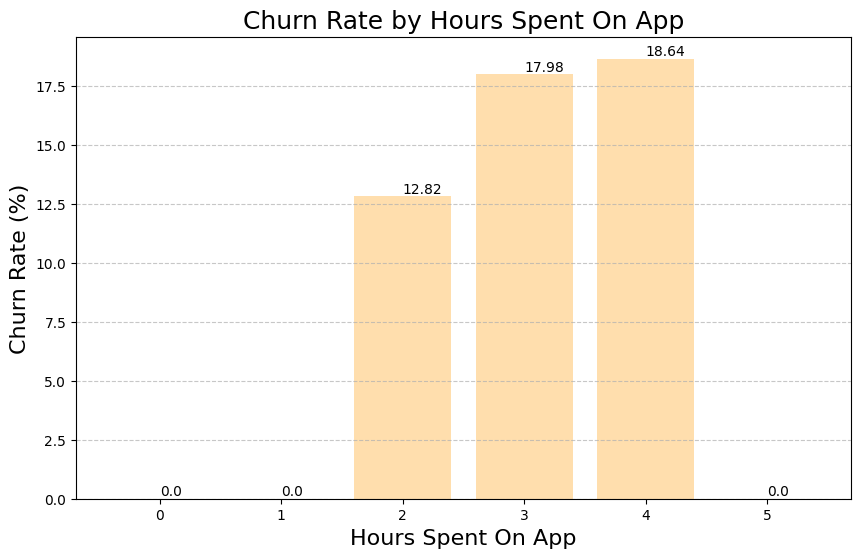

In [ ]:
# Calculate churn rate
hours_churn_rate = df.groupby('HourSpendOnApp')['Churn'].mean() * 100

# Creating a plot to visualize the relationship
plt.figure(figsize=(10, 6))
bars = plt.bar(hours_churn_rate.index, hours_churn_rate.values, color='navajowhite')

# Adding text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('Churn Rate by Hours Spent On App', size=18)
plt.xlabel('Hours Spent On App', size=16)
plt.ylabel('Churn Rate (%)', size=16)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

INFERENCE:




*   0, 1, and 5 Hours: There is a 0% churn rate for customers who spend 0, 1, and 5 hours on the app. This could indicate either a very small number of users in these categories or exceptionally high retention for these groups.
*   2 Hours: The churn rate is 12.82% for users who spend 2 hours on the app.

*   3 Hours: Users who spend 3 hours on the app have a slightly higher churn rate of 17.98%.
*  4 Hours: The churn rate for users spending 4 hours on the app is 18.64%.







5. Is there a correlation between the Preferred Login Device and Churn Rate?

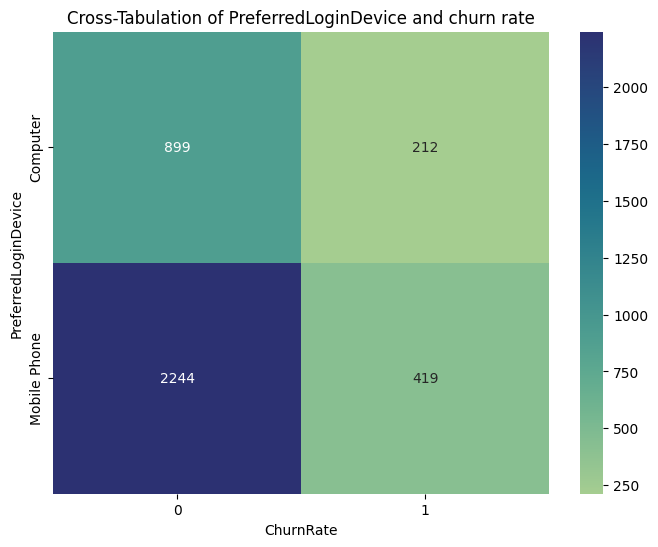

Churn,0,1
PreferredLoginDevice,,
Computer,80.92,19.08
Mobile Phone,84.27,15.73


In [ ]:
cross_tab = pd.crosstab(df['PreferredLoginDevice'],df['Churn'])
#chi-Square test of independence to see if there is a significant relationship
from scipy.stats import chi2_contingency
chi2,p,dof,expected= chi2_contingency(cross_tab)
# visualizing the cross-tabulation
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab,annot=True,fmt='d',cmap='crest')
plt.title('Cross-Tabulation of PreferredLoginDevice and churn rate')
plt.xlabel('ChurnRate')
plt.ylabel('PreferredLoginDevice')
plt.show()


device_churn_percentage= pd.crosstab(df['PreferredLoginDevice'], df['Churn'], normalize='index') * 100
# Convert percentages for easier interpretation
device_churn_percentage=device_churn_percentage.round(2)
device_churn_percentage

INFERENCE:


*   Customers who prefer using a computer for login have a slightly higher churn rate (19.08%) compared to those who prefer mobile phones (15.73). Mobile user have a higher retention rate.





6. How does the combination of gender and marital status affect churn rates?

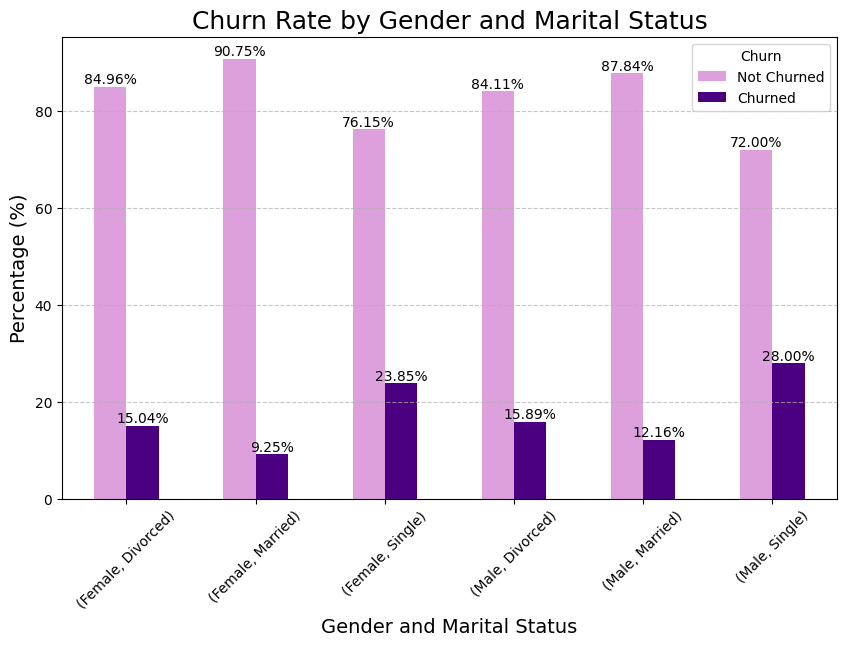

In [ ]:
# Calculate churn rate
gender_marital_status_churn = pd.crosstab(index=[df['Gender'], df['MaritalStatus']], columns=df['Churn'], normalize='index') * 100

# Creating a stacked bar plot to visualize this relationship
ax = gender_marital_status_churn.plot(kind='bar', stacked=False, color=['plum', 'indigo'], figsize=(10, 6))

# Adding text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Churn Rate by Gender and Marital Status', size=18)
plt.xlabel('Gender and Marital Status', size=14)
plt.ylabel('Percentage (%)', size=14)
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

INFERENCE:
There is a significant difference in churn rates between genders within identical marital status categories, particularly among single customers.


*   Single male customers exhibit the highest churn rate (28.00%) among all groups.
*  Married female customers have the highest retention rate (90.75%) and the lowest churn rate (9.25%).
*   Married and divorced customers have lower churn rates compared to single customers.






7.Does the the number of devices registered combined with preferred payment mode impact churn?

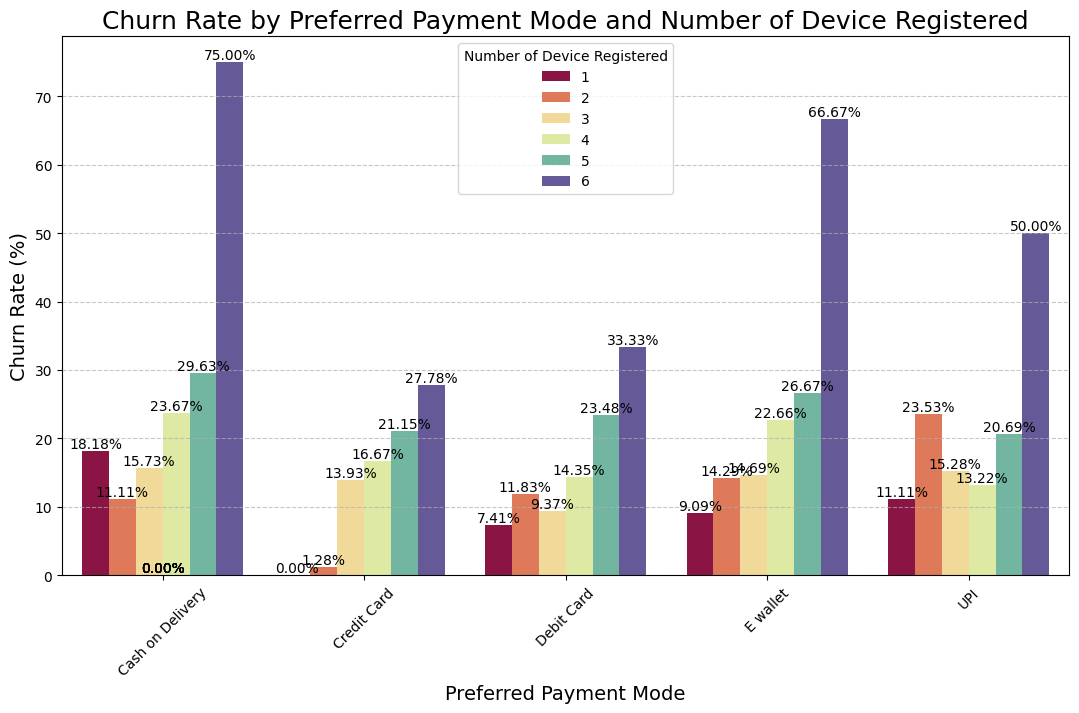

In [ ]:
# Creating a crosstab to analyze churn rate by preferred payment mode and number of device registered
payment_mode_device_churn = pd.crosstab(index=[df['PreferredPaymentMode'], df['NumberOfDeviceRegistered']], columns=df['Churn'], normalize='index') * 100

# Creating a visualization for this relationship
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='PreferredPaymentMode', y=1, hue='NumberOfDeviceRegistered', data=payment_mode_device_churn.reset_index(),
                 palette='Spectral')

# Adding respective values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Churn Rate by Preferred Payment Mode and Number of Device Registered', size=18)
plt.xlabel('Preferred Payment Mode', size=14)
plt.ylabel('Churn Rate (%)', size=14)
plt.xticks(rotation=45)
plt.legend(title='Number of Device Registered')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

INFERENCE:
*   The lowest churn rate is observed among customers using a credit card with only 1 device registered.
*   Customers using the E wallet Payment method with 6 devices registered have the highest churn rate across all combinations.
*   The next highest churn rate is observed for customers using cash on delivery with 6 device registered.

# MODEL FOR PREDICTION  (Random Forest Classifier)

ENCODING CATEGORICAL VARIABLES INTO NUMERICAL VARIABLES.

In [ ]:
le = LabelEncoder()
df['PreferredLoginDevice'] = le.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = le.fit_transform(df['PreferredPaymentMode'])
df['Gender'] = le.fit_transform(df['Gender'])
df['PreferedOrderCat'] = le.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

# Split the dataset into training and testing datasets
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training a Random Forest classifier on the training dataset.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       963
           1       0.92      0.79      0.85       170

    accuracy                           0.96      1133
   macro avg       0.94      0.89      0.92      1133
weighted avg       0.96      0.96      0.96      1133



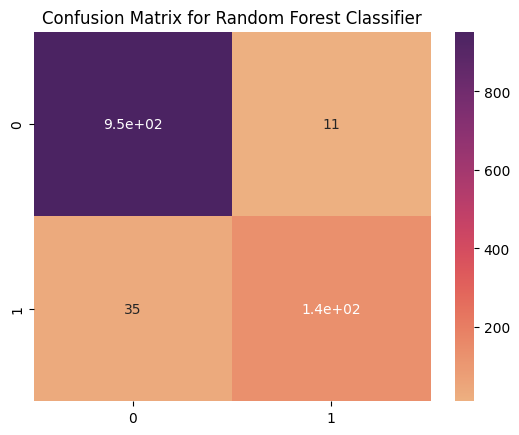

,Predicted: 0,Predicted: 1
Actual: 0,952,11
Actual: 1,35,135


In [ ]:
# Model Evaluation - evaluate the performance of the model on the testing dataset

# Make predictions on the testing dataset
y_pred = rf.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(rf.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='flare')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(cm_df)

INFERENCE:


*   **Accuracy:** The accuracy of the model is 96%, which means that it correctly predicts the churn or non-churn status for 96% of the customers in the testing dataset.



*   **Precision:**
    Precision for class 0 (Not Churned) is 96%. This indicates that among all the customers predicted as not churned, 96% of them are actually not churned.

    Precision for class 1 (Churned) is 92%. This means that among all the customers predicted as churned, 92% of them are actually churned.
*   **Recall:**
    Recall for class 0 (Not Churned) is 99%. This implies that out of all the actual not churned customers, the model correctly identifies 99% of them.
  
    Recall for class 1 (Churned) is 79%. This suggests that out of all the actual churned customers, the model correctly identifies 79% of them.





*   **F1-score:**
    The F1-score is a harmonic mean of precision and recall. For class 0, the F1-score is 0.98, and for class 1, it is 0.85.
*   **Confusion Matrix:**
    The confusion matrix provides a detailed breakdown of the model's predictions. In this case, out of 963 actual not churned customers, the model correctly predicts 952 (True Negatives), but it incorrectly predicts 11 as churned (False Positives). Similarly, out of 170 actual churned customers, the model correctly predicts 135 (True Positives), but it incorrectly predicts 35 as not churned (False Negatives).







Which of the predictors is a major influencing factor in churn rate?

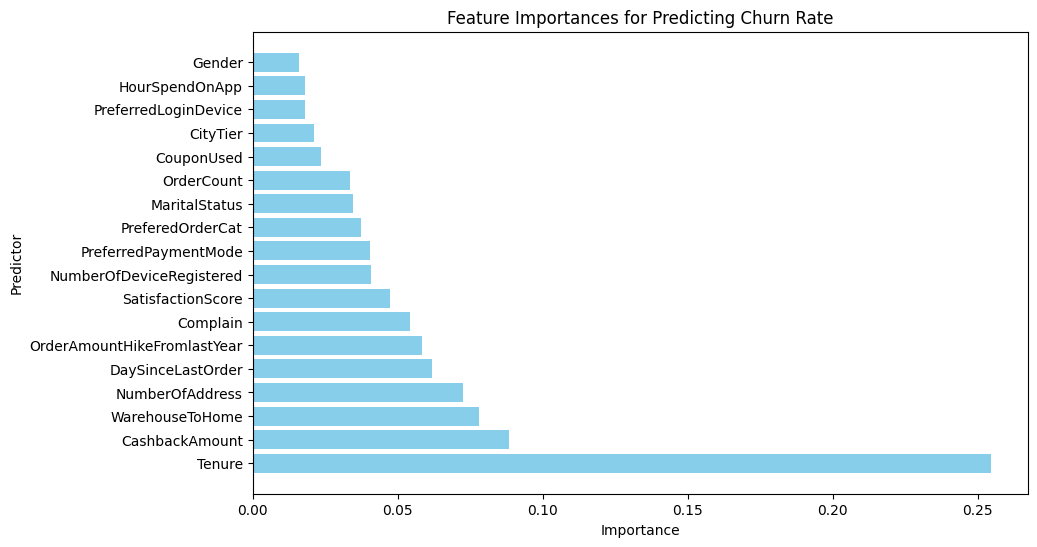

In [ ]:
feature_importances = rf.feature_importances_

# Get column names (predictor names)
predictor_names = X.columns

# Create a DataFrame to store feature importances along with predictor names
feature_importance_df = pd.DataFrame({'Predictor': predictor_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Predictor'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Predictor')
plt.title('Feature Importances for Predicting Churn Rate')
plt.show()

INFERENCE:
The most influencing amount in churn rate is Tenure, followed by CashbackAmount. The least influencing factor is Gender.

ROC CURVE FOR RANDOM FOREST CLASSIFIER

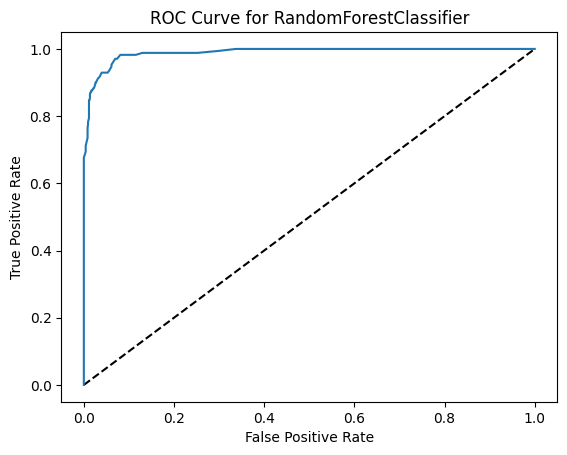

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.show()

# MODEL FOR PREDICTION (Logistic Regression)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

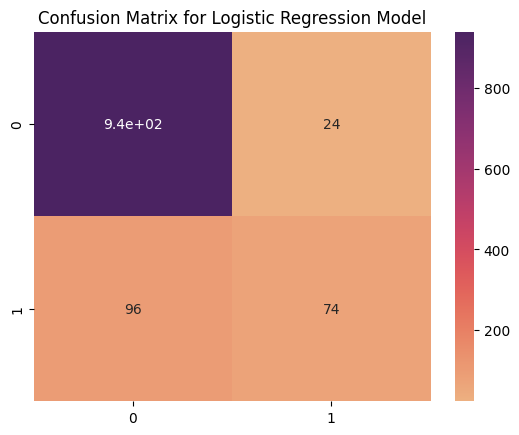

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       963
           1       0.76      0.44      0.55       170

    accuracy                           0.89      1133
   macro avg       0.83      0.71      0.75      1133
weighted avg       0.88      0.89      0.88      1133



,Predicted: 0,Predicted: 1
Actual: 0,939,24
Actual: 1,96,74


In [ ]:
# Make predictions on the testing dataset
y_pred = lr.predict(X_test)


# Check the confusion matrix of the model
con_m = confusion_matrix(y_test, y_pred)
sns.heatmap(con_m, annot=True,cmap='flare')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
# Check the accuracy of the model
print("Accuracy:", round(lr.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))


# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
con_m_df = pd.DataFrame(con_m, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(con_m_df)

INFERENCE:


*   **Accuracy:** The accuracy of the model is 89%, which means that it correctly predicts the churn or non-churn status for 89% of the customers in the testing dataset.
*   **Precision:**
    Precision for class 0 (Not Churned) is 91%. This indicates that among all the customers predicted as not churned, 91% of them are actually not churned.
    Precision for class 1 (Churned) is 76%. This means that among all the customers predicted as churned, 76% of them are actually churned.
*  **Recall:**
    Recall for class 0 (Not Churned) is 98%. This implies that out of all the actual not churned customers, the model correctly identifies 98% of them.
    Recall for class 1 (Churned) is 44%. This suggests that out of all the actual churned customers, the model correctly identifies only 44% of them.
*   **F1-score:**
    The F1-score is a harmonic mean of precision and recall. For class 0, the F1-score is 0.94, and for class 1, it is 0.55.
*   **Confusion Matrix:**
    The confusion matrix provides a detailed breakdown of the model's predictions. In this case, out of 963 actual not churned customers, the model correctly predicts 939 (True Negatives), but it incorrectly predicts 24 as churned (False Positives). Similarly, out of 170 actual churned customers, the model correctly predicts 74 (True Positives), but it incorrectly predicts 96 as not churned (False Negatives).





Overall, the model performs relatively well in predicting customers who do not churn (class 0), with high precision, recall, and F1-score. However, its performance is significantly lower for predicting churned customers (class 1), especially in terms of recall, where it correctly identifies only 44% of actual churned customers. This suggests that the model might need further improvement, particularly in identifying churned customers.




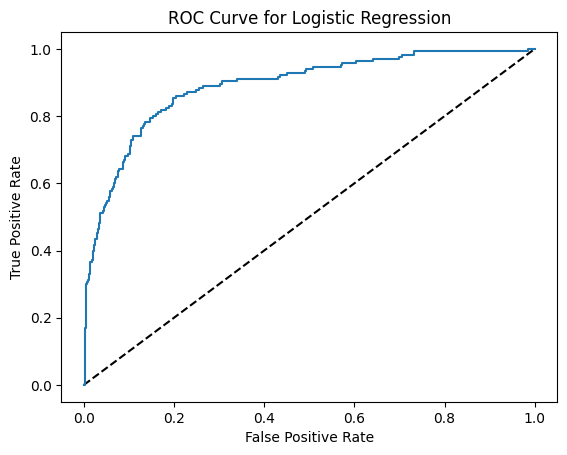

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

THEREFORE, THE RANDOM FOREST CLASSIFIER HAS PERFORMED BETTER THAN LOGISTIC REGRESSION MODEL.